<a href="https://colab.research.google.com/github/Charles20239/Credit_Card_Default_Prediction/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('default_of_credit_card_clients.csv', header=1)

In [3]:
# show data
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# adjust "EDUCATION" column
data["EDUCATION"] = data["EDUCATION"].replace({0:4, 5:4 ,6:4})
# adjust "MARRIAGE" column
data["MARRIAGE"] = data["MARRIAGE"].replace({0:3})

In [5]:
# show data information
data.shape

(30000, 25)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split data into features (X) and target (Y)
X = data.drop(["ID","default payment next month"],axis = 1)  # exclude the last column (the target) and the first two rows (header)
Y = data["default payment next month"]  # last column is the target variable

# standardize characteristics
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((21000, 23), (9000, 23))

**Test neural net work**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# define model
model = Sequential([
    Dense(64, input_dim=23, activation='relu'),  # Input layer and the first hidden layer
    Dense(32, activation='relu'),                # the second hidden layer
    Dense(16, activation='relu'),                # the third hidden layer
    Dense(1, activation='sigmoid')               # output layer
])

# compile model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# train model
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=64)


Epoch 1/50
263/263 [==============================] - 8s 4ms/step - loss: 0.4773 - accuracy: 0.8054 - val_loss: 0.4600 - val_accuracy: 0.8079
Epoch 2/50
263/263 [==============================] - 1s 4ms/step - loss: 0.4423 - accuracy: 0.8188 - val_loss: 0.4516 - val_accuracy: 0.8117
Epoch 3/50
263/263 [==============================] - 1s 4ms/step - loss: 0.4336 - accuracy: 0.8201 - val_loss: 0.4518 - val_accuracy: 0.8107
Epoch 4/50
263/263 [==============================] - 1s 4ms/step - loss: 0.4287 - accuracy: 0.8217 - val_loss: 0.4489 - val_accuracy: 0.8126
Epoch 5/50
263/263 [==============================] - 1s 4ms/step - loss: 0.4243 - accuracy: 0.8235 - val_loss: 0.4472 - val_accuracy: 0.8112
Epoch 6/50
263/263 [==============================] - 1s 4ms/step - loss: 0.4209 - accuracy: 0.8249 - val_loss: 0.4459 - val_accuracy: 0.8107
Epoch 7/50
263/263 [==============================] - 1s 4ms/step - loss: 0.4190 - accuracy: 0.8236 - val_loss: 0.4491 - val_accuracy: 0.8100
Epoch 

In [8]:
# evaluated on the test set
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"loss on test set: {loss:.4f}")
print(f"accuracy on test set: {accuracy:.4f}")

282/282 [==============================] - 1s 2ms/step - loss: 0.4905 - accuracy: 0.7986
loss on test set: 0.4905
accuracy on test set: 0.7986


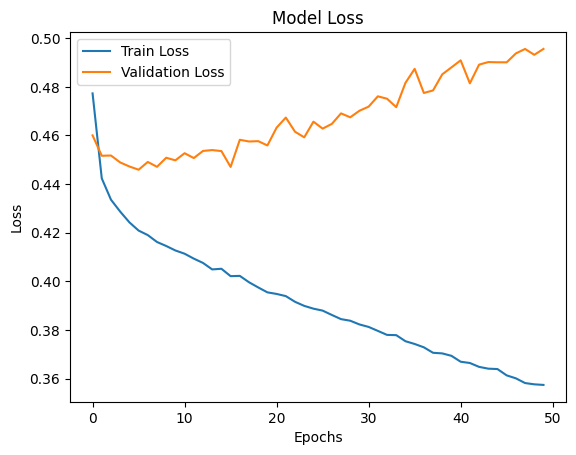

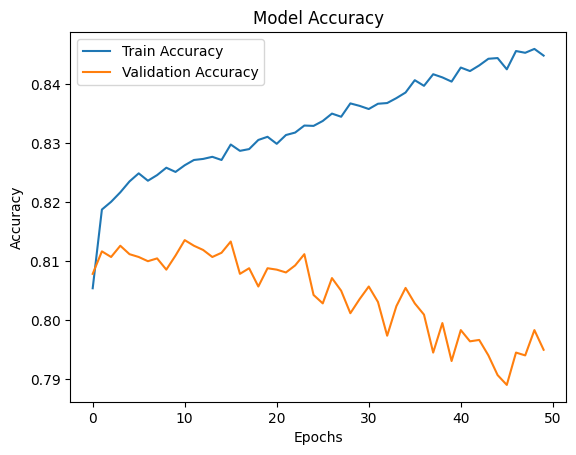

In [9]:
import matplotlib.pyplot as plt

# plot the training loss and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


In [10]:
from sklearn.metrics import classification_report

# generating predictions (probabilities)
y_pred_prob = model.predict(X_test)

# convert probabilities to labels
Y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]


282/282 [==============================] - 1s 2ms/step


In [11]:
print(classification_report(Y_test, Y_pred, target_names=['Not Default', 'Default']))


              precision    recall  f1-score   support

 Not Default       0.84      0.91      0.88      7040
     Default       0.55      0.39      0.46      1960

    accuracy                           0.80      9000
   macro avg       0.70      0.65      0.67      9000
weighted avg       0.78      0.80      0.79      9000



**Start cross validation(unbalanced data)**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

def build_model(n_layers, n_units, optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(n_units, input_dim=23, activation='relu'))

    for _ in range(n_layers - 1):
        model.add(Dense(n_units, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# define neural net model
def build_model(n_layers, n_units, optimizer, learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(n_units, activation='relu', input_shape=(23,)))  # input layer
    for _ in range(1, n_layers):
        model.add(tf.keras.layers.Dense(n_units, activation='relu'))  # hidden layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # output layer

    # optimizer
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# parameters
optimizer_options = ['adam', 'sgd']
learning_rate_options = [0.001, 0.01, 0.1]
layer_options = [1, 2, 3, 4]
unit_options = [32, 64, 128, 256]
batch_size_options = [32, 64, 128]
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_score = 0
best_params = {}

# grid search
for optimizer in optimizer_options:
    for learning_rate in learning_rate_options:
        for n_layers in layer_options:
            for n_units in unit_options:
                for batch_size in batch_size_options:
                    cv_scores = []
                    for train, test in kfold.split(X_train, Y_train):
                        # change data set typr
                        X_train_fold = X_train[train]
                        Y_train_fold = Y_train.iloc[train].values
                        X_test_fold = X_train[test]
                        Y_test_fold = Y_train.iloc[test].values

                        model = build_model(n_layers, n_units, optimizer, learning_rate)
                        model.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=batch_size, verbose=0)
                        scores = model.evaluate(X_test_fold, Y_test_fold, verbose=0)
                        cv_scores.append(scores[1])  # suppose scores[1] is accuracy
                    score = np.mean(cv_scores)
                    if score > best_score:
                        best_score = score
                        best_params = {
                            'optimizer': optimizer,
                            'learning_rate': learning_rate,
                            'n_layers': n_layers,
                            'n_units': n_units,
                            'batch_size': batch_size
                        }
                    print(f"Opt: {optimizer}, LR: {learning_rate}, Layers: {n_layers}, Units: {n_units}, Batch Size: {batch_size}, Mean CV Accuracy: {score:.2f}")

print(f"Best Score: {best_score:.2f}")
print("Best Parameters:", best_params)


In [ ]:
# model with the best parameters
best_model = build_model(best_params['n_layers'], best_params['n_units'], best_params['optimizer'], best_params['learning_rate'])

# re-train model
history = best_model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=best_params['batch_size'])


In [ ]:
# plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# generating predictions (probabilities)
y_pred_prob = model.predict(X_test)

# convert probabilities to labels
Y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

In [ ]:
print(classification_report(Y_test, Y_pred, target_names=['Not Default', 'Default']))

**Start cross validation(balanced data)**

In [ ]:
# balance the data, create two data type
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# define neural net model
def build_model(n_layers, n_units, optimizer, learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(n_units, activation='relu', input_shape=(23,)))  # input layer
    for _ in range(1, n_layers):
        model.add(tf.keras.layers.Dense(n_units, activation='relu'))  # hidden layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # output layer

    # optimizer
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# parameters
optimizer_options = ['adam', 'sgd']
learning_rate_options = [0.001, 0.01, 0.1]
layer_options = [1, 2, 3, 4]
unit_options = [32, 64, 128, 256]
batch_size_options = [32, 64, 128]
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_score = 0
best_params = {}

# grid search
for optimizer in optimizer_options:
    for learning_rate in learning_rate_options:
        for n_layers in layer_options:
            for n_units in unit_options:
                for batch_size in batch_size_options:
                    cv_scores = []
                    for train, test in kfold.split(X_resampled, Y_resampled):
                        # change data set typr
                        X_train_fold = X_resampled[train]
                        Y_train_fold = Y_resampled.iloc[train].values
                        X_test_fold = X_resampled[test]
                        Y_test_fold = Y_resampled.iloc[test].values

                        model = build_model(n_layers, n_units, optimizer, learning_rate)
                        model.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=batch_size, verbose=0)
                        scores = model.evaluate(X_test_fold, Y_test_fold, verbose=0)
                        cv_scores.append(scores[1])  # suppose scores[1] is accuracy
                    score = np.mean(cv_scores)
                    if score > best_score:
                        best_score = score
                        best_params = {
                            'optimizer': optimizer,
                            'learning_rate': learning_rate,
                            'n_layers': n_layers,
                            'n_units': n_units,
                            'batch_size': batch_size
                        }
                    print(f"Opt: {optimizer}, LR: {learning_rate}, Layers: {n_layers}, Units: {n_units}, Batch Size: {batch_size}, Mean CV Accuracy: {score:.2f}")

print(f"Best Score: {best_score:.2f}")
print("Best Parameters:", best_params)


In [ ]:
# model with the best parameters
best_model = build_model(best_params['n_layers'], best_params['n_units'], best_params['optimizer'], best_params['learning_rate'])

# re-train model
history = best_model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=best_params['batch_size'])


In [ ]:
# plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# generating predictions (probabilities)
y_pred_prob = model.predict(X_test)

# convert probabilities to labels
Y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

In [ ]:
print(classification_report(Y_test, Y_pred, target_names=['Not Default', 'Default']))